## Exercise 1: Exploring Attack Surface Management Data with Pandas and Seaborn

This notebook demonstrates how to import and analyze an **Attack Surface Management (ASM)** dataset. Although this dataset is not from a real tool, data in this dataset matches  
We'll use **pandas** for data manipulation and **seaborn** for visualization.

**What's the story?**

You are a new analyst in your security operations center. As a new member of the team, you have been asked to explore the **attack surface** of your organization. The **attack surface** is the set of points on the boundary of a system, a system element, or an environment where an attacker can try to enter, cause an effect on, or extract data from, that system, system element, or environment.

As a member of an organization's security team, it is usually a great idea to have an understanding of what you are trying to keep secure-- your data, assets, and even your personnel! We will explore the assets in your organization as part of this exercise. This is the first step in many data science exercises-- data exploration!


### Key Questions:
- What is the distribution of risk levels in my environment?
- How many assets are in the cloud vs. on-prem?
- Which services are most exposed?
- How does vulnerability severity vary across risk levels?

Let's import some packages and configure our plotting:

In [1]:
# Packages to import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Configure visualization style
sns.set_style("whitegrid")

# Load dataset (Update path if necessary)
file_path = "../data/attack_surface_management_data_part_3.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,timestamp,asset_id,asset_type,host_name,protocol,port,vulnerability_id,vulnerability_severity,risk_score,operating_system,owner_group,location,ip_address,vulnerability_description,patch_status,last_scanned,priority
0,2025-01-27T02:56:30Z,03ad58a0,cloud,host-clo-03ad58a0,SSH,22,CVE-2012-3560,Low,23,Azure,Network,US-West1,48.92.139.224,SQL Injection vulnerability in WordPress plugin.,Patched,2025-03-08T08:38:35Z,Low
1,2025-02-03T19:19:34Z,8b75da12,on-prem,host-on--8b75da12,HTTP,80,CVE-2011-5863,Medium,41,Ubuntu 20.04,IT,US-West1,216.204.76.235,SQL Injection vulnerability in WordPress plugin.,Unpatched,2025-02-11T12:49:52Z,Low
2,2025-03-09T04:47:37Z,7ff1409d,on-prem,host-on--7ff1409d,HTTP,8080,CVE-2016-9898,Medium,41,macOS Monterey,Network,US-West1,19.157.157.137,SQL Injection vulnerability in WordPress plugin.,Unpatched,2025-02-02T05:30:10Z,Low
3,2025-02-09T12:10:44Z,043b7810,cloud,host-clo-043b7810,SSH,22,CVE-2009-4540,High,88,GCP,Security,US-East1,23.176.158.234,Privilege escalation vulnerability in Linux ke...,Unpatched,2025-03-13T07:33:07Z,Medium
4,2025-03-04T22:05:47Z,cfdc08d8,cloud,host-clo-cfdc08d8,HTTPS,443,CVE-2005-3401,Low,38,DigitalOcean,Operations,LAXDC,233.79.3.76,Buffer overflow vulnerability in OpenSSL.,Patched,2025-03-03T15:53:07Z,Low


In [3]:
# Display dataset info
df.info()

# Check for missing values -- a good idea if you want to check the quality of your data!
df.isnull().sum()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75313 entries, 0 to 75312
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  75313 non-null  object
 1   asset_id                   75313 non-null  object
 2   asset_type                 75313 non-null  object
 3   host_name                  75313 non-null  object
 4   protocol                   75313 non-null  object
 5   port                       75313 non-null  int64 
 6   vulnerability_id           75313 non-null  object
 7   vulnerability_severity     75313 non-null  object
 8   risk_score                 75313 non-null  int64 
 9   operating_system           75313 non-null  object
 10  owner_group                75313 non-null  object
 11  location                   75313 non-null  object
 12  ip_address                 75313 non-null  object
 13  vulnerability_description  75313 non-null  object
 14  patch_

,port,risk_score
count,75313.000000,75313.000000
mean,848.859214,41.675567
std,2099.266781,27.601967
min,21.000000,10.000000
25%,23.000000,16.000000
50%,80.000000,37.000000
75%,443.000000,67.000000
max,8080.000000,106.000000


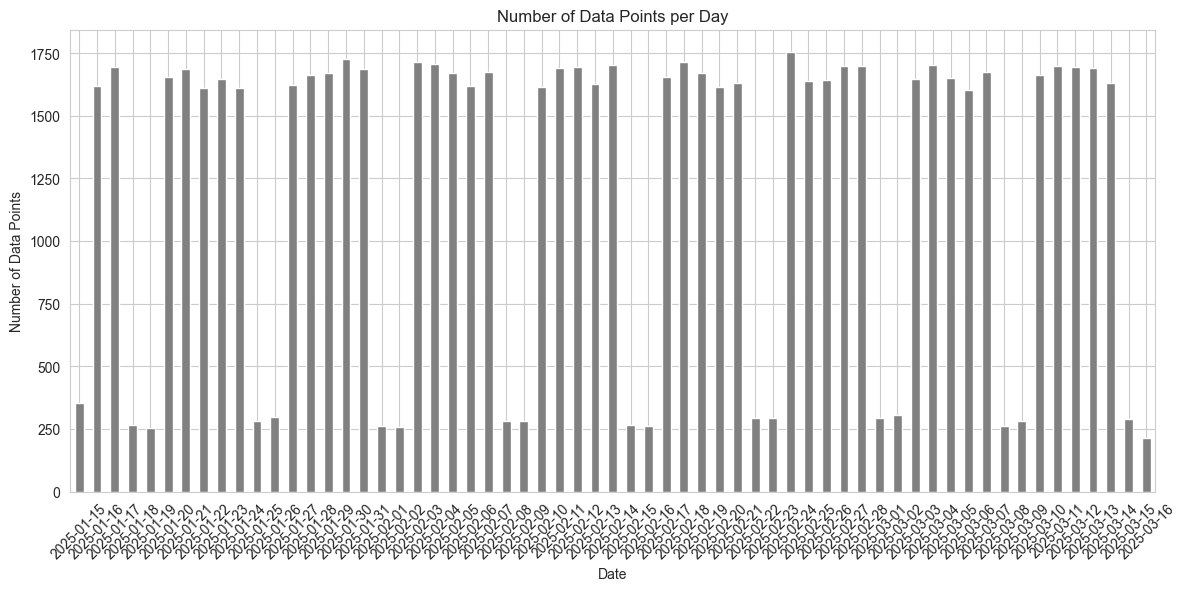

In [4]:
# How old is my data? When was the data captured?
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by date and count occurrences
df['date'] = df['timestamp'].dt.date  # Extract only the date (without time)
data_counts = df.groupby('date').size()

# Plot the results
plt.figure(figsize=(14, 6))
data_counts.plot(kind='bar', color='gray')
plt.xlabel("Date")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Day")
plt.xticks(rotation=45)
plt.show()

Why might there be way fewer datapoints on some dates relative to others? Do you think you will see the same pattern in average risk scores for the day? Why or why not?

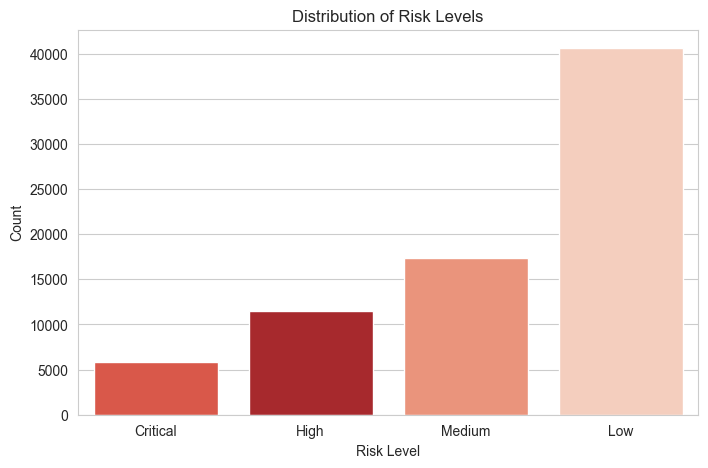

In [5]:
# Count plot for risk levels
# What is the distribution of risk levels in my environment?
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="priority", order=["Critical", "High", "Medium", "Low"], hue = "priority", palette="Reds")
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

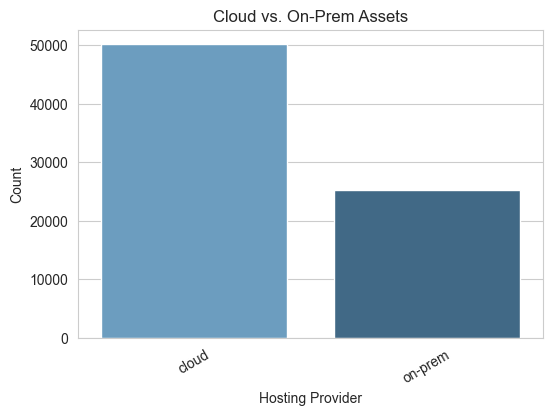

In [6]:
# Count cloud vs. on-prem assets
# How many assets are in the cloud vs. on-prem?
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="asset_type", order=['cloud', 'on-prem'], hue = 'asset_type', palette="Blues_d")
plt.title("Cloud vs. On-Prem Assets")
plt.xticks(rotation=30)
plt.xlabel("Hosting Provider")
plt.ylabel("Count")
plt.show()

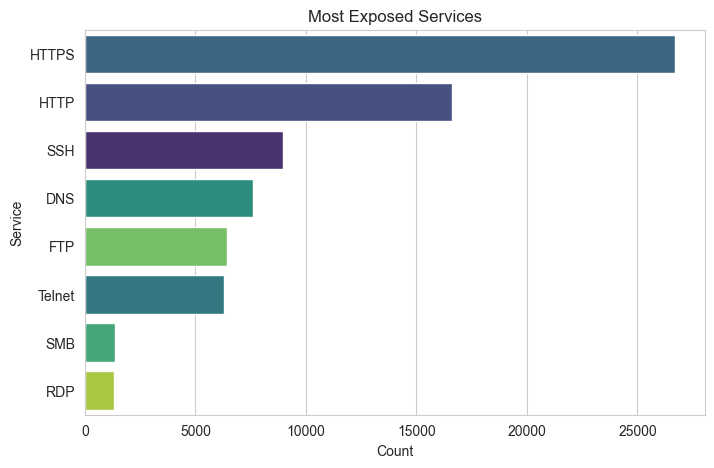

In [15]:
# Count most common exposed services
# Which services are most exposed?
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="protocol", order=df["protocol"].value_counts().index, hue = "protocol", palette="viridis")
plt.title("Most Exposed Services")
plt.xlabel("Count")
plt.ylabel("Service")
plt.show()

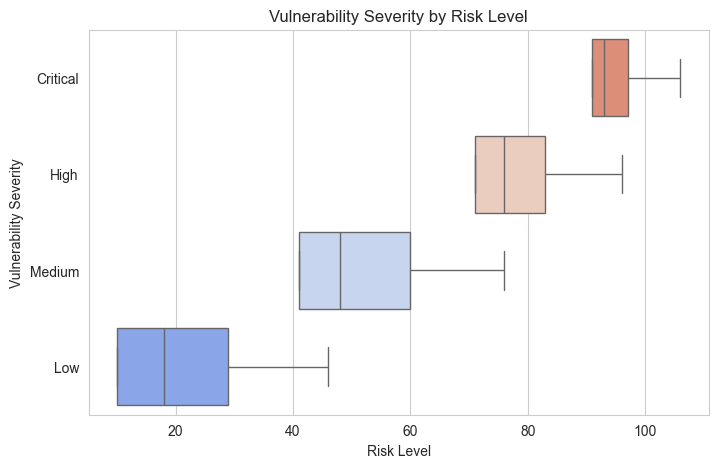

In [16]:
# Box plot: Risk Level vs. Vulnerability Severity
# - How does vulnerability severity vary across risk levels?
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="risk_score", y="vulnerability_severity", order=["Critical", "High", "Medium", "Low"], hue = 'vulnerability_severity', palette="coolwarm")
plt.title("Vulnerability Severity by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Vulnerability Severity")
plt.show()

## Key Takeaways:
- **Risk Level Distribution**: Helps prioritize mitigation efforts.
- **Cloud vs. On-Prem Assets**: Identifies potential exposure in cloud environments.
- **Exposed Services**: Highlights commonly exposed attack vectors.
- **Risk vs. Vulnerabilities**: Shows correlation between risk level and detected issues.

### Next Steps You Could Take:
- Drill down into specific IPs and domains for targeted mitigation.
- Identify misconfigured or outdated technologies.
- Monitor high-risk assets for frequent scanning.
- Plot the risk scores over time to see how it is changing!